In [193]:
print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing   import StandardScaler

Automatically created module for IPython interactive environment


In [194]:
def true_fun(X):
    return np.expand_dims((0.5*X[:,1]+X[:,3]**2-0.1*X[:,6]),axis=-1)

np.random.seed(0)

n_samples = 20
n_sensors = 8

In [195]:
unnormalised_X = np.random.rand(n_samples,n_sensors)
unnormalised_y = true_fun(unnormalised_X)

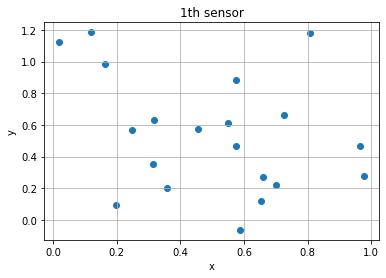

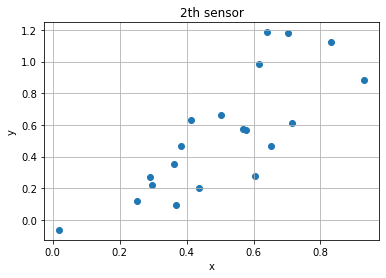

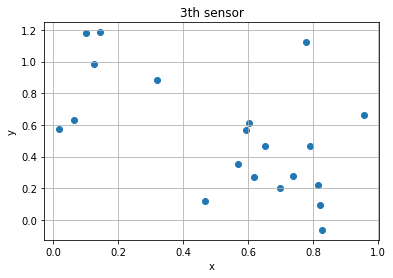

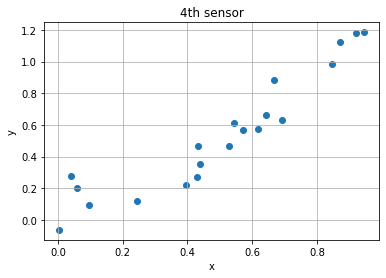

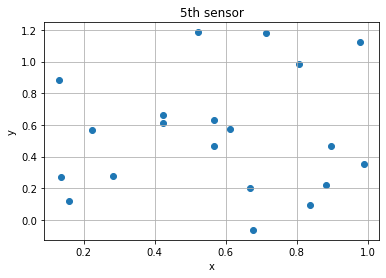

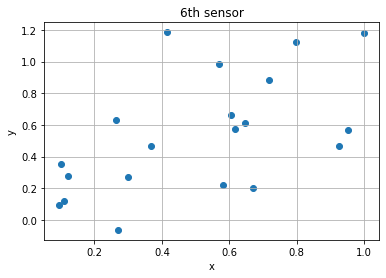

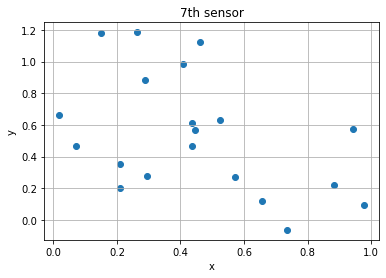

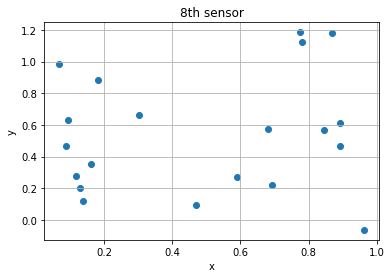

In [196]:
for i in range(n_sensors):
    plt.figure()
    plt.title("{}th sensor".format(i+1))
    plt.scatter(unnormalised_X[:,i],unnormalised_y)
    plt.xlabel('x');plt.ylabel('y');plt.grid(True)

In [197]:
scaler_X = StandardScaler().fit(unnormalised_X)
scaler_y = StandardScaler().fit(unnormalised_y)
X = scaler_X.transform(unnormalised_X)
y = scaler_y.transform(unnormalised_y)

In [198]:
from sklearn import linear_model

In [199]:
first_try_alpha = 0.3
lasso_model = linear_model.Lasso(alpha=first_try_alpha)
lasso_model.fit(X,y)
for i,c in enumerate(lasso_model.coef_):
    print("{}th coeff : {:.2f}".format(i+1,c))

1th coeff : -0.00
2th coeff : 0.15
3th coeff : -0.00
4th coeff : 0.54
5th coeff : 0.00
6th coeff : 0.00
7th coeff : -0.00
8th coeff : 0.00


# For different alphas?

In [200]:
alphas = np.linspace(0,1,100)
coeffs = np.zeros([100,n_sensors])
for i,alpha in enumerate(alphas):
    lasso_model = linear_model.Lasso(alpha=alpha)
    lasso_model.fit(X,y)
    coeffs[i,:] = lasso_model.coef_
    

<ipython-input-200-292adafa195d>:5: UserWarning: With alpha=0, this algorithm does not converge well. You are advised to use the LinearRegression estimator
  lasso_model.fit(X,y)
/Users/Tommaso/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: UserWarning: Coordinate descent with no regularization may lead to unexpected results and is discouraged.
  model = cd_fast.enet_coordinate_descent(
/Users/Tommaso/opt/miniconda3/lib/python3.8/site-packages/sklearn/linear_model/_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.388676419183867, tolerance: 0.0019999999999999996
  model = cd_fast.enet_coordinate_descent(


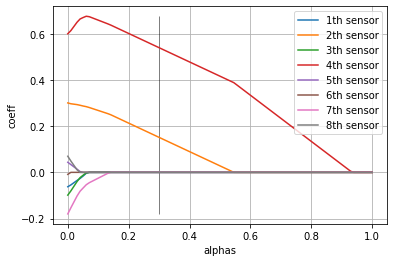

In [205]:
for s in range(n_sensors):
    plt.plot(alphas,coeffs[:,s],label="{}th sensor".format(s+1))
plt.legend()
plt.xlabel('alphas');plt.ylabel('coeff');plt.grid(True)
plt.vlines(first_try_alpha,np.min(coeffs),np.max(coeffs),'k',lw=0.5)

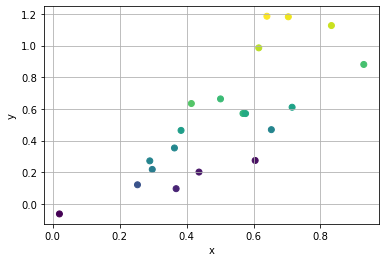

In [206]:
plt.figure()# 1,3,6
#plt.title("{}th sensor".format(i+1))
plt.scatter(unnormalised_X[:,1],unnormalised_y,c=unnormalised_X[:,3])
plt.xlabel('x');plt.ylabel('y');plt.grid(True)